# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  1050k      0  0:01:27  0:01:27 --:--:--  948k6M    0     0  1070k      0  0:01:26  0:01:13  0:00:13 1122k
total 64
-rw-r--r--     1 catherinechen  staff      0 Jun 29 09:18 README.md
-rw-r--r--@    1 catherinechen  staff  28915 Jun 30 12:11 image_denoising.ipynb
drwx------  1087 catherinechen  staff  34784 Jun  9 15:06 paintings
drwxr-xr-x     4 catherinechen  staff    128 Jun 30 09:23 tests


In [2]:
import glob

dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

In [3]:
len(dataset_paths)

1085

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

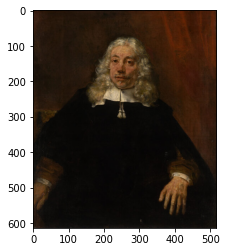

In [4]:
# YOUR CODE HERE

# get the path of the image at index 53
path_53 = dataset_paths[53]

# open the image 
from PIL import Image
import matplotlib.pyplot as plt

with Image.open(path_53) as im:
    plt.imshow(im)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [5]:
# YOUR CODE HERE

# shape of the image 
pixels = Image.open(path_53)
img_shape = pixels.size

img_shape

(517, 614)

In [6]:
import numpy as np
im = Image.open(path_53)
a = np.asarray(im)
a.shape

(614, 517, 3)

In [7]:
# as it is a colourful image -> 3 dimensions for RGB
img_dim = 3

❓ **What was in the image above?**

In [8]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [9]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [10]:
#check for one 
import numpy as np
im = Image.open(path_53)
a = np.asarray(im)
a

array([[[57, 41, 25],
        [53, 37, 22],
        [44, 28, 13],
        ...,
        [63, 53, 41],
        [62, 52, 42],
        [47, 37, 28]],

       [[56, 40, 25],
        [54, 38, 23],
        [50, 32, 20],
        ...,
        [64, 50, 39],
        [63, 51, 39],
        [49, 39, 29]],

       [[49, 31, 21],
        [51, 33, 23],
        [50, 32, 20],
        ...,
        [64, 46, 34],
        [56, 42, 31],
        [44, 32, 20]],

       ...,

       [[50, 36, 25],
        [47, 34, 25],
        [54, 41, 32],
        ...,
        [35, 26, 17],
        [40, 31, 22],
        [45, 36, 27]],

       [[61, 47, 36],
        [57, 43, 32],
        [67, 53, 42],
        ...,
        [41, 32, 23],
        [44, 35, 26],
        [49, 39, 30]],

       [[67, 53, 42],
        [61, 47, 36],
        [67, 53, 42],
        ...,
        [42, 33, 26],
        [46, 37, 28],
        [51, 41, 32]]], dtype=uint8)

In [11]:
# YOUR CODE HERE

dataset_images = []

for img in dataset_paths:
    pixels = Image.open(img)
    a = np.asarray(pixels)
    dataset_images.append(a)


In [12]:
len(dataset_images), len(dataset_images[0])

(1085, 358)

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [13]:
# YOUR CODE HERE
import pandas as pd

In [15]:
dataset_images[1].shape

(627, 604, 3)

In [16]:
list_dim = []
for img in dataset_images:
    list_dim.append(len(np.asarray(img).shape))

In [17]:
print(list_dim.count(2))
print(list_dim.count(3))

72
1013


> It seems that the images in the dataset don't have the same number of dimensions. Some images are in black and white. Thus they only have 2 dimensions (72 images).

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [18]:
from tqdm import tqdm

dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:01<00:00, 755.33it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [19]:
# YOUR CODE HERE

#check the shape : height, width, dim
dataset_images[53].shape

(614, 517, 3)

In [20]:
dataset_images[1].shape

(627, 604, 3)

In [21]:
height = []
width = []


for img in dataset_images:
    height.append(np.asarray(img).shape[0])
    width.append(np.asarray(img).shape[1])
    
print("height", "max:", max(height), "min:", min(height))
print("width", "max:", max(width), "min:", min(width))

height max: 1459 min: 140
width max: 1634 min: 124


In [22]:
# resizing 
from tensorflow.image import resize

#check for one 
resize(dataset_images[53], (120, 100)).shape

TensorShape([120, 100, 3])

I've tried to get all the images, but it's taking FOREVER to convert the list of array into an array in order to get dataset_resized (np.asarray(resized_img) TOOO LONG) -> so I'm running my cells below with only a quarter...

In [23]:
len(dataset_images)/4

271.25

In [24]:
# resizing all

resized_img = []

for image in dataset_images[:272]:
    resized_img.append(resize(image, (120, 100)))


In [25]:
len(resized_img)

272

In [26]:
#taking too much time with all the dataset... 
#dataset_resized = np.asarray(resized_img)

In [27]:
dataset_resized = np.asarray(resized_img)

Failed tentative :

dataset_resized = np.zeros((120, 100, 3))
count = 0

for resized in resized_img:
    dataset_resized[count] = resized
    count += 1

In [28]:
dataset_resized.shape

(272, 120, 100, 3)

In [29]:
dataset_resized.ndim

4

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [30]:
# YOUR CODE HERE
print(np.max(dataset_resized), np.min(dataset_resized))

255.0 0.0


In [31]:
# Let's divide by 255 

def norm(x):
    x = x/255
    return x
dataset_scaled = norm(dataset_resized)
dataset_scaled

array([[[[0.3556438 , 0.32948694, 0.36344773],
         [0.41529053, 0.37607485, 0.4074474 ],
         [0.37133497, 0.3268252 , 0.34760946],
         ...,
         [0.4434847 , 0.31407294, 0.34932458],
         [0.45864722, 0.33315703, 0.345     ],
         [0.4250095 , 0.2982251 , 0.31250015]],

        [[0.39482942, 0.36867258, 0.40263334],
         [0.37260392, 0.33338824, 0.3647608 ],
         [0.4063039 , 0.3617941 , 0.3825784 ],
         ...,
         [0.42392695, 0.2945152 , 0.3298093 ],
         [0.43445954, 0.30896935, 0.3285772 ],
         [0.40827528, 0.28149092, 0.3010207 ]],

        [[0.35246405, 0.3263072 , 0.36026797],
         [0.35856044, 0.31934476, 0.3507173 ],
         [0.40789217, 0.36338234, 0.38416666],
         ...,
         [0.4042806 , 0.27486885, 0.31279346],
         [0.39662766, 0.2672159 , 0.29474187],
         [0.3830315 , 0.2524889 , 0.28861848]],

        ...,

        [[0.26157683, 0.26416507, 0.30726314],
         [0.3922745 , 0.3569412 , 0.32937256]

In [33]:
# Let's check the max and mean:
print(np.max(dataset_scaled), np.min(dataset_scaled))

1.0 0.0


### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [34]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(272, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

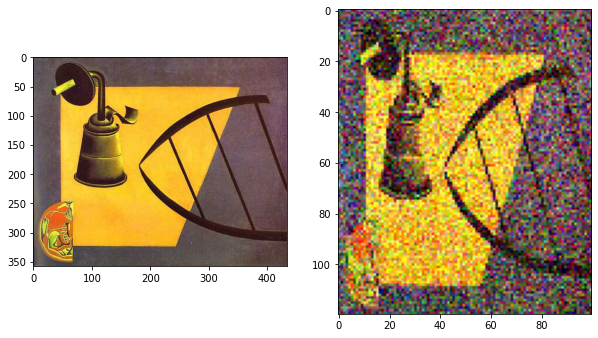

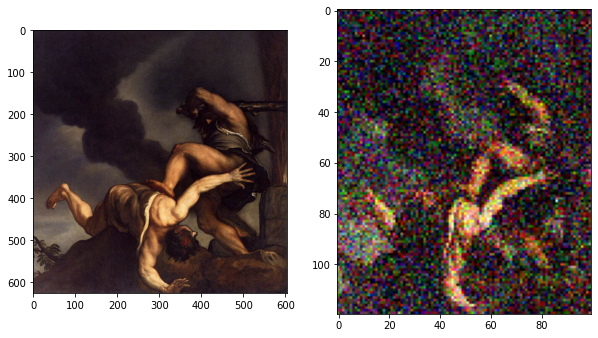

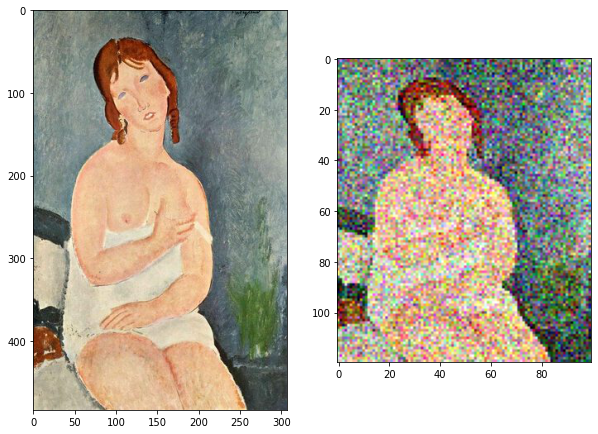

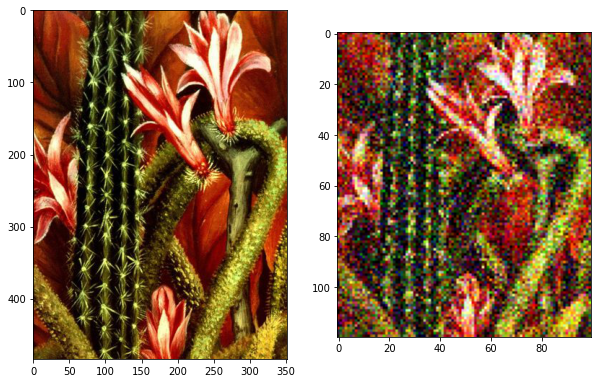

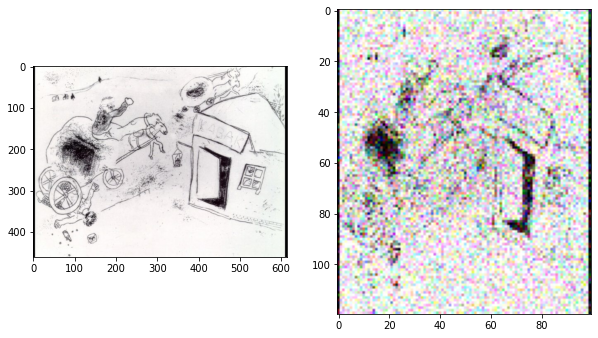

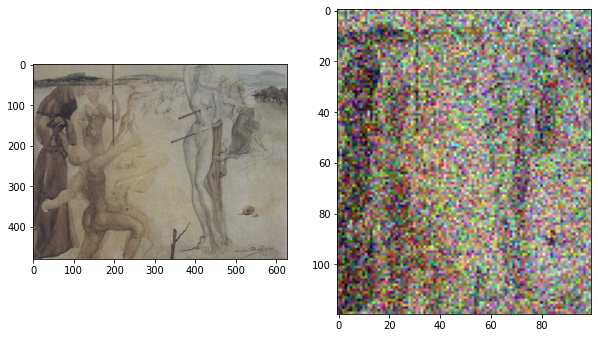

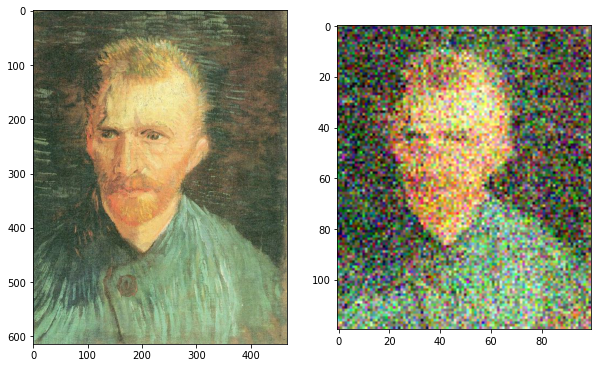

In [42]:
# YOUR CODE HERE

for i, (raw_image, noised_image) in enumerate(zip(dataset_images, dataset_noisy)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    ax1.imshow(raw_image)
    ax2.imshow(noised_image)
    plt.show()
    
    if i > 5:
        break

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [45]:
# YOUR CODE HERE

from sklearn.model_selection import train_test_split

X = dataset_noisy
y = dataset_scaled

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

In [46]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

In [47]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  298M  100  298M    0     0   963k      0  0:05:16  0:05:16 --:--:-- 1061k 0  0:05:04  0:00:18  0:04:46  982k   0     0  1018k      0  0:04:59  0:00:39  0:04:20  965k   0     0   955k      0  0:05:19  0:01:35  0:03:44 1060k     0   944k      0  0:05:23  0:01:55  0:03:28  978k 111M    0     0   943k      0  0:05:23  0:02:01  0:03:22  911k   0     0   954k      0  0:05:19  0:02:19  0:03:00 1108k 0     0   952k      0  0:05:20  0:02:26  0:02:54  904k   0     0   953k      0  0:05:20  0:02:39  0:02:41  955k 0     0   954k      0  0:05:19  0:02:42  0:02:37 1030k    0   937k      0  0:05:25  0:03:06  0:02:19  652kM    0     0   931k      0  0:05:27  0:03:59  0:01:28 1029k3M    0     0   945k      0  0:05:22  0:04:34  0:00:48 1091k    0   948k      0  0:05:21  0:04:46  0:00:35  983k   956k      0  0:05:18  0:05:00  0:00:18 1135k  959

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [48]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [49]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [51]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

input_shape = (120,100,3)

encoder = Sequential(name= "encoder")
encoder.add(layers.Conv2D(filters=30, kernel_size=(5, 5), strides=(2, 2), padding='valid', input_shape=input_shape))
encoder.add(layers.Conv2D(filters=20, kernel_size=(4, 4), strides=(2, 2), padding='valid'))
# encoder.add(layers.Conv2D(filters=10, kernel_size=(2, 2), strides=(1, 1), padding='valid'))

encoder.add(layers.Flatten())
encoder.add(layers.Dense(units=20, activation='relu'))
encoder.add(layers.Dense(6000, activation='softmax')) 

encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 58, 48, 30)        2280      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 23, 20)        9620      
_________________________________________________________________
flatten_1 (Flatten)          (None, 12880)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                257620    
_________________________________________________________________
dense_3 (Dense)              (None, 6000)              126000    
Total params: 395,520
Trainable params: 395,520
Non-trainable params: 0
_________________________________________________________________


👉 **Test your encoder below**

In [52]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              395520    
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 402,195
Trainable params: 402,195
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [ ]:
# YOUR CODE HERE

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [ ]:
# YOUR CODE HERE

❓ **Plot your training and validation loss at each epoch using the cell below**

In [ ]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [ ]:
# YOUR CODE HERE

In [ ]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()